#                   Projeto - Análise e Transformação de Dados


    O projeto relativo à cadeira de Análise e Tranformação de Dados consite em várias experiências que foram realizadas com um grupo de 30 voluntários na faixa etária de 19 a 48 anos, seguindo um protocolo composto por um conjunto de atividades básicas estáticas, dinâmicas e de transição.
    Este mesmo projeto, visa a análise de dados nos domínios do tempo e da frequência, usando sinais recolhidos de acelerómetros de smartphones com o objetivo de classificar/identificar a atividade realizada, correspondente a 12 movimentos diferentes, nomeadamente:
    
    Dinâmicos
        1. Andando (WALKING)
        2. Subindo Escadas (WALKING_UPSTAIRS)
        3. Descendo Escadas (WALKING_DOWNSTAIRS)
        
    Estáticos:
        4. Sentado (SITTING)
        5. De pé (STANDING)
        6. Deitado (LAYING)
        
    Transição
        7. De pé -> Sentado (STAND_TO_SIT)
        8. Sentado -> De pé (SIT_TO_STAND)
        9. Sentado -> Deitado (SIT_TO_LIE)
        10. Deitado -> Sentado (LIE_TO_SIT)
        11. De pé -> Deitado (STAND_TO_LIE)
        12. Deitado -> De pé (LIE_TO_STAND)

    Sendo um dos objetivos deste projeto, corresponde à monotorização permanente e precisa da atividade do individuo, de modo a atuar caso ocorra algum evento grave.


### Guião do projeto

#### 1. Obter os sinais dos acelerómetros nos 3 eixos (X, Y e Z) relativos à sua turma PL e desenvolver o código necessário para os importar.

Percorrer ficheiros relativos à PL6 e guardar a informação em arrays para posterior tratamento.
Foi criado um dicionário com o nome das atividades e respetivos números contidos no labels.txt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

arrayNomesFiles = ["acc_exp42_user21.txt","acc_exp43_user21.txt","acc_exp44_user22.txt","acc_exp45_user22.txt","acc_exp46_user23.txt","acc_exp47_user23.txt","acc_exp48_user24.txt","acc_exp49_user24.txt"]
atividades = {1: ["W","blue"], 2: ["W_U","green"], 3:["W_D","purple"],4: ["SIT","red"], 5:["STAND","salmon"], 6: ["LAY","pink"],7: ["STAND_SIT","brown"], 8: ["SIT_STAND","olive"], 9: ["SIT_LIE","cyan"],10: ["LIE_SIT","teal"], 11: ["STAND_LIE","magenta"], 12: ["LIE_STAND","tomato"]}
exp = [42,43,44,45,46,47,48,49]
usr = [21,22,23,24]

#Ex1
def readFiles(arrayNomesFiles):
    infoArray = []
    auxLabels = []
    aux = []
    for i in range(len(arrayNomesFiles)):
        with open(arrayNomesFiles[i],'r') as file:
            for j in file:
                aux.append([float(j.split()[0]),float(j.split()[1]),float(j.split()[2])])
            teste = np.array(aux)
            infoArray.append(teste)
            aux.clear()

    with open('labels.txt','r') as labels:
        for i in labels:
            auxLabels.append([int(i.split()[0]),int(i.split()[1]),int(i.split()[2]),int(i.split()[3]),int(i.split()[4])])

    return infoArray,auxLabels

data, labels = readFiles(arrayNomesFiles)

#### 2. Representar graficamente os sinais importados para cada eixo (X, Y e Z), identificando adequadamente a atividade a que cada segmento do sinal corresponde.

Processamento de dados e posterior apresentação(gráficos).

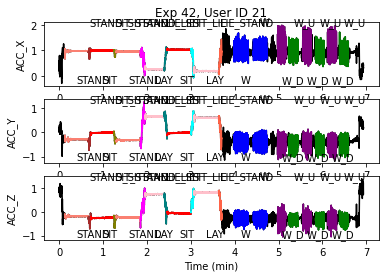

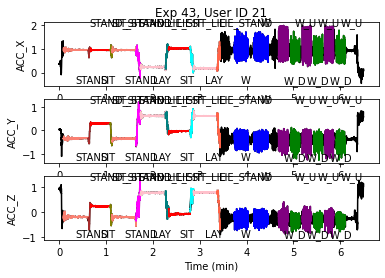

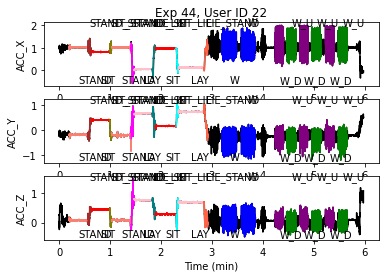

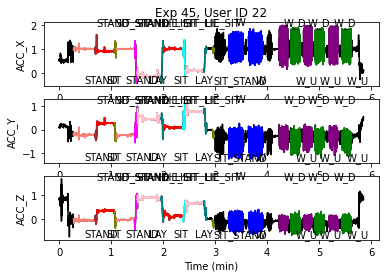

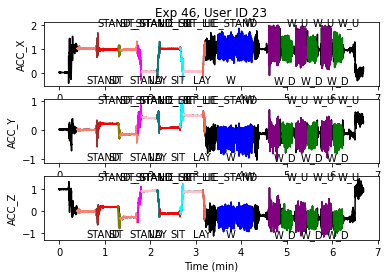

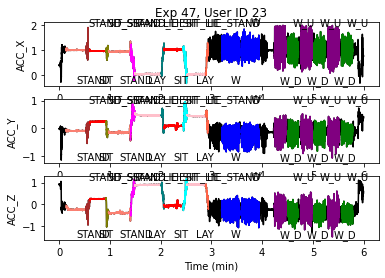

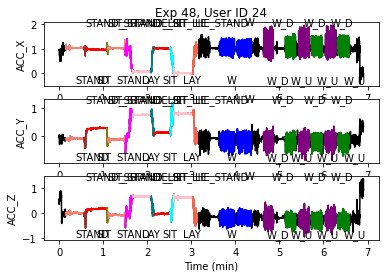

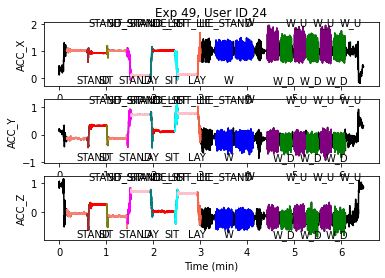

In [2]:
def showSignals(data,labels,experimentID,userID,atividades):
    x = []
    y = []
    z = []
    time = []
    lab = []
    xyz = [x,y,z]
   

    for i in range(len(data)):
        time.append((i / 50) / 60)
        x.append((data[i][0]).tolist())
        y.append((data[i][1]).tolist())
        z.append((data[i][2]).tolist())


    for i in range(len(labels)):
        if labels[i][0] == experimentID and labels[i][1] == userID:

            lab.append([labels[i][2],labels[i][3],labels[i][4]])

    #print(lab)

    plt.figure()

    #um para x, y z
    for i in range(1,4,1):
        plt.subplot(3, 1, i)

        if i == 1:
            plt.title("Exp " + str(experimentID) + ", User ID " + str(userID))
            plt.ylabel("ACC_X")
        elif i == 2:
            plt.ylabel("ACC_Y")
        elif i == 3:
            plt.ylabel("ACC_Z")

        plt.plot(time,xyz[i-1],'black')
        plt.xlabel("Time (min)")

        for j in range(len(lab)):

            plt.plot(time[lab[j][1]:lab[j][2]], xyz[i-1][lab[j][1]:lab[j][2]],atividades[lab[j][0]][1])

            #50 --- 50 Hz label start point
            #60 --- segundos
            #max e min para escrever em cima e em baixo respetivamente
            #cena do par para alternar
            if j % 2 == 0:
                plt.text((((lab[j][1] + lab[j][2]) // 2) / 50) / 60, min(xyz[i-1]),atividades[lab[j][0]][0])
            else:
                plt.text((((lab[j][1] + lab[j][2]) // 2) / 50) / 60, max(xyz[i-1]),atividades[lab[j][0]][0])

    plt.show()

    x.clear()
    y.clear()
    z.clear()
    time.clear()

for i in range(8):
        showSignals(data[i],labels,exp[i],usr[i // 2],atividades)

#### 3. Pretende-se calcular a DFT do segmento do sinal associado a cada atividade, para os vários utilizadores, e identificar as características principais de cada atividade.

####           3.1 Calcular a DFT de cada segmento do sinal para as várias atividades e para os vários utilizadores. Organizar os resultados por atividade.

Calculo da Transformada de Fourrier Discreta e posterior apresentação dos dados em gráficos.

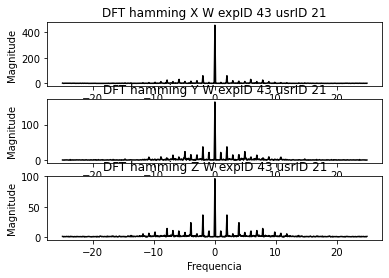

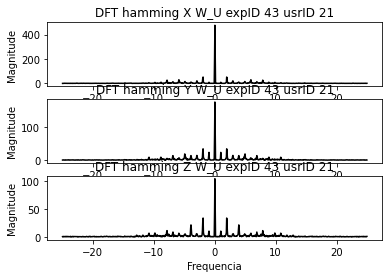

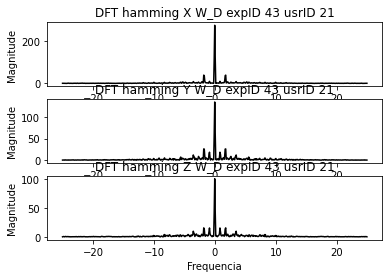

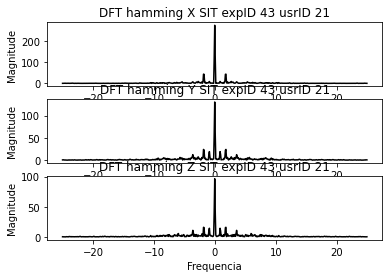

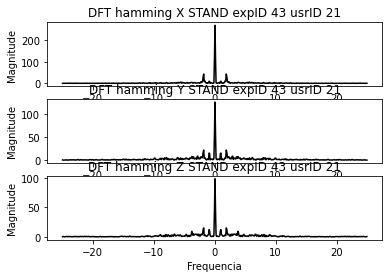

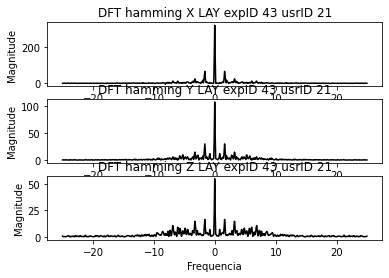

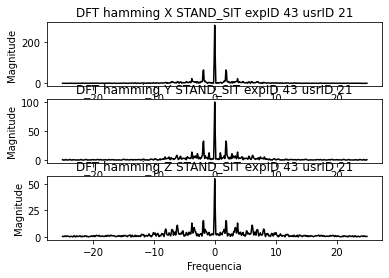

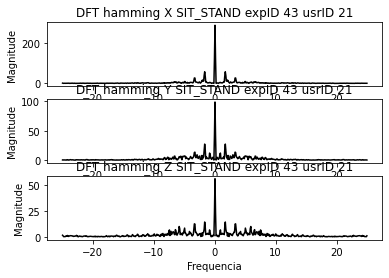

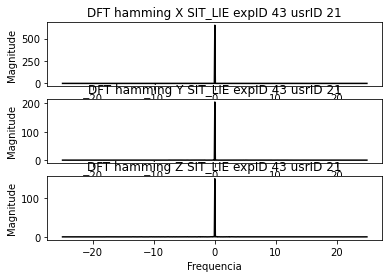

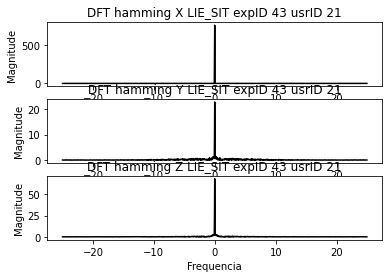

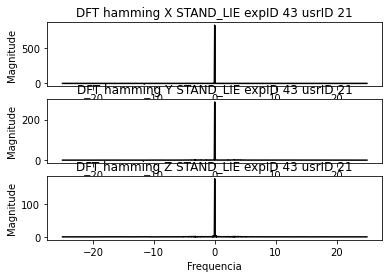

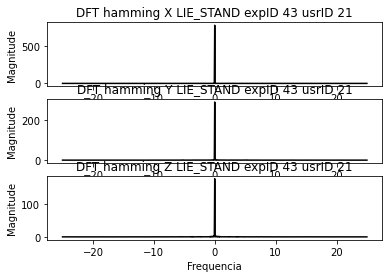

In [3]:
def DFT(data,labels,experimentID,userID,numAux,atividades):
    frequencia = 50
    periodo = 1 / frequencia
    x = []
    y = []
    z = []
    atividadeEixoX = [[] for i in range(12)]
    atividadeEixoY = [[] for i in range(12)]
    atividadeEixoZ = [[] for i in range(12)]

    for k in range(len(data)):
        x.append(data[k][0])
        y.append(data[k][1])
        z.append(data[k][2])

    for i in range(12):
        for j in range(len(labels)):
            if labels[j][0] == experimentID:
                if labels[j][1] == userID:
                    if labels[j][2] == i + 1:
                        atividadeEixoX[numAux].append(x[labels[j][3]:labels[j][4]])
                        atividadeEixoY[numAux].append(y[labels[j][3]:labels[j][4]])
                        atividadeEixoZ[numAux].append(z[labels[j][3]:labels[j][4]])

        xyz = ["X", "Y", "Z"]

        xNum = np.array(atividadeEixoX[numAux][i])
        yNum = np.array(atividadeEixoY[numAux][i])
        zNum = np.array(atividadeEixoZ[numAux][i])
        xyzNum = [xNum,yNum,zNum]

        xTime = np.linspace(0, ((xNum.size - 1) * periodo) / 60, xNum.size)
        yTime = np.linspace(0, ((yNum.size - 1) * periodo) / 60, yNum.size)
        zTime = np.linspace(0, ((zNum.size - 1) * periodo) / 60, zNum.size)

        hammingX = np.hamming(xTime.size)
        hammingY = np.hamming(yTime.size)
        hammingZ = np.hamming(zTime.size)
        hamingXYZ = [hammingX,hammingY,hammingZ]


        
        plt.figure()
        for k in range(3):
            dft = abs(np.fft.fftshift(np.fft.fft(xyzNum[k] * hamingXYZ[k])))
    
            if dft.size % 2 == 0:
                freqfundamental = np.arange(-frequencia / 2 + frequencia / (2 * dft.size), frequencia / 2 - frequencia / (2 * dft.size) + frequencia / dft.size, frequencia / dft.size)
            else:
                freqfundamental = np.arange(-frequencia / 2, frequencia / 2, frequencia / dft.size)

            plt.subplot(3,1,k+1)
            plt.title("DFT hamming "+ xyz[k]+ " "+ atividades[i+1][0] + " expID " + str(experimentID) + " usrID " + str(userID))
            plt.plot(freqfundamental,dft,"black")
            plt.xlabel("Frequencia")
            plt.ylabel("Magnitude")

        plt.show()

for i in range(1):
    DFT(data[1],labels,exp[1],usr[1 // 2],1,atividades)

####           3.2 Identificar as características mais relevantes, nomeadamente espectrais, para cada atividade, analisando e apresentando os resultados obtidos por atividade.

Através da analise dos gráficos, pode-se verificar que os picos de magnitude são bastante úteis porque indicam que existe um elevado número de dados que são semelhantes, o que, permite uma melhor obtenção de conclusões e estrapulação de uma caracteristica para um determinado moveimento, visto que é transversal a diversas experiências (ex: passos).
Por sua vez, a maginitude média permite distinguir que tipo de movimento está a ser executado, que segundo o enunciado, se pode dividir em três tipos: estático, transição e dinâmico.
Por fim, a magnitude máxima e mínima permite identificar movimentos.

####           3.3 Para cada atividade dinâmica, identificar estatisticamente o número de passos por minuto para cada utilizador. Criar uma tabela com os resultados obtidos e calcular o valor médio e o desvio padrão por atividade.

Para a resolução deste exercício, foi utilizado o eixo Z como referência por ser um eixo com maior probabilidade de existência de picos, visto que são atividades dinâmicas.
Procurar posições onde existem picos existentes nos arrays de informação e posteriormente armazenamento da quantidade de picos para puder calcular médias e desvio padrão.

In [6]:
def tabelas3_3(data,labels,experimentID,userID,atividades):
    frequencia = 50
    periodo = 1 / frequencia
    x = []
    y = []
    z = []
    atividadeEixoX = [[] for i in range(8)]
    atividadeEixoY = [[] for i in range(8)]
    atividadeEixoZ = [[] for i in range(8)]
    numeroPassosX = []
    numeroPassosY = []
    numeroPassosZ = []
    numeroPassosXYZ = [numeroPassosX,numeroPassosY,numeroPassosZ]

    for k in range(len(data)):
        x.append(data[k][0])
        y.append(data[k][1])
        z.append(data[k][2])

    for i in range(3): #so para atividades dinamicas
        for j in range(len(labels)):
            if labels[j][0] == experimentID and labels[j][1] == userID and labels[j][2] == i + 1:
                atividadeEixoX[i].append(x[labels[j][3]:labels[j][4]])
                atividadeEixoY[i].append(y[labels[j][3]:labels[j][4]])
                atividadeEixoZ[i].append(z[labels[j][3]:labels[j][4]])


        xNum = np.array(atividadeEixoX[i][1])
        yNum = np.array(atividadeEixoY[i][1])
        zNum = np.array(atividadeEixoZ[i][1])
        xyzNum = [xNum,yNum,zNum]

        xTime = np.linspace(0, ((xNum.size - 1) * periodo) / 60, xNum.size)
        yTime = np.linspace(0, ((yNum.size - 1) * periodo) / 60, yNum.size)
        zTime = np.linspace(0, ((zNum.size - 1) * periodo) / 60, zNum.size)

        hammingX = np.hamming(xTime.size)
        hammingY = np.hamming(yTime.size)
        hammingZ = np.hamming(zTime.size)
        hamingXYZ = [hammingX, hammingY, hammingZ]


        for j in range(3):
            dft = abs(np.fft.fftshift(np.fft.fft(sig.detrend(xyzNum[j] * hamingXYZ[j]))))
            no_passos = len(sig.find_peaks(dft)[0]) / 2
            numeroPassosXYZ[j].append(no_passos)

    xyz = ["X","Y","Z"]

    #media
    print("Medias:\n")
    for i in range(3):
        for j in range(3):
            print("Atividade: "+atividades[i + 1][0] + "   Eixo: "+ xyz[j] + "  Valor: " + str(np.median(numeroPassosXYZ[j])/60))

    print("\n\nDesvio Padrão:\n")
    for i in range(3):
        for j in range(3):
            print("Atividade: " + atividades[i + 1][0] + "   Eixo: "+ xyz[j] + "  Valor: " + str(np.std(numeroPassosXYZ[j])/60))
            
tabelas3_3(data[0],labels,exp[0],usr[0 // 2],atividades)

Medias:

Atividade: W   Eixo: X  Valor: 1.5
Atividade: W   Eixo: Y  Valor: 1.45
Atividade: W   Eixo: Z  Valor: 1.4916666666666667
Atividade: W_U   Eixo: X  Valor: 1.5
Atividade: W_U   Eixo: Y  Valor: 1.45
Atividade: W_U   Eixo: Z  Valor: 1.4916666666666667
Atividade: W_D   Eixo: X  Valor: 1.5
Atividade: W_D   Eixo: Y  Valor: 1.45
Atividade: W_D   Eixo: Z  Valor: 1.4916666666666667


Desvio Padrão:

Atividade: W   Eixo: X  Valor: 0.3333564806777822
Atividade: W   Eixo: Y  Valor: 0.4253720230864876
Atividade: W   Eixo: Z  Valor: 0.4147920794034072
Atividade: W_U   Eixo: X  Valor: 0.3333564806777822
Atividade: W_U   Eixo: Y  Valor: 0.4253720230864876
Atividade: W_U   Eixo: Z  Valor: 0.4147920794034072
Atividade: W_D   Eixo: X  Valor: 0.3333564806777822
Atividade: W_D   Eixo: Y  Valor: 0.4253720230864876
Atividade: W_D   Eixo: Z  Valor: 0.4147920794034072


####          3.4 Identificar as características, por exemplo espectrais, que permitam distinguir as atividades estáticas, de transição e dinâmicas. Apresentar os resultados graficamente. Avaliar osresultados obtidos em termos de sensibilidade e especificidade.

####           3.5 Identificar as características, por exemplo espectrais, que permitam distinguir cada tipo de atividade. Apresentar os resultados graficamente. Avaliar os resultados obtidos em termos de sensibilidade e especificidade.

#### 4. Obter computacionalmente as distribuições tempo-frequência para o sinal do acelerómetro no “eixo Z” para um ficheiro de dados à sua escolha. Usar a Short-Time Fourier Transform (STFT). 

####           4.1 Escolher, justificadamente, a janela a considerar na aplicação da STFT. Para isso, selecionar uma atividade dinâmica e usar diferentes tipos de janela para segmentar o sinal associado a essa atividade. Calcular a DFT do segmento com as diferentes janelas e comparar os resultados obtidos, procurando evidenciar o efeito das diferentes janelas.

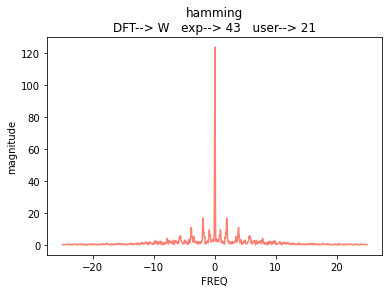

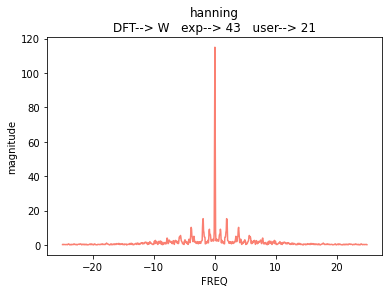

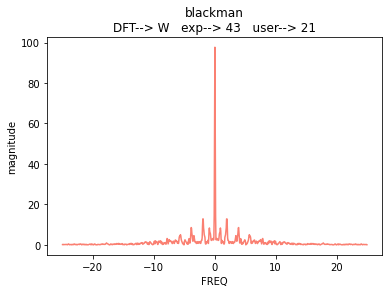

In [7]:
def ex4_1(data,labels,experimentID,userID,atvID,numAux,atividades):
    frequencia = 50
    periodo = 1 / frequencia
    atividadeEixoZ = [[] for i in range(12)]

    z = []
    for k in range(len(data)):
        z.append(data[k][2])
    for j in range(len(labels)):
        if labels[j][0] == experimentID and labels[j][1] == userID and labels[j][2] == atvID + 1:

            atividadeEixoZ[numAux].append(z[labels[j][3]:labels[j][4]])

    zNum = np.array(atividadeEixoZ[numAux][atvID])

    zTime = np.linspace(0, (zNum.size - 1) * periodo / 60, zNum.size)

    #Diferentes tipos de janelas
    hamming = []
    hanning = []
    blackman = []
    janelas = [hamming,hanning,blackman]
    janelasNomes = ["hamming","hanning","blackman"]

    janelas[0].append(np.hamming(zTime.size))
    janelas[1].append(np.hanning(zTime.size))
    janelas[2].append(np.blackman(zTime.size))

    dft = [[] for i in range(3)]
    for i in range(3):
        dft[i].append(abs(np.fft.fftshift(np.fft.fft(zNum * janelas[i][0]))))
    
    dftSize = dft[i][0].size
    #g  raficos
    for i in range(3):
        plt.figure()

        if dft[i][0].size % 2 == 0:
            freqfundamental = np.arange(-frequencia / 2 + frequencia / (2 * dftSize), frequencia / 2 - frequencia / (2 * dftSize) + frequencia / dftSize, frequencia / dftSize)
        else:
            freqfundamental = np.arange(-frequencia / 2, frequencia / 2, frequencia / dftSize)

        plt.title(janelasNomes[i] + "\n" + "DFT--> " + atividades[atvID + 1][0] + "   exp--> " + str(experimentID) + "   user--> " + str(userID))
        plt.plot(freqfundamental,dft[i][0],"salmon")
        plt.xlabel("FREQ")
        plt.ylabel("magnitude")

        plt.show()
    atividadeEixoZ.clear()

for i in range(1,2):
    ex4_1(data[0],labels,exp[i],usr[0 // 2],0,0,atividades)


####          4.2 Desenvolver a sua própria função para o cálculo da STFT. + 4.3 Aplicar a STFT ao sinal com a janela deslizante selecionada, usando os parâmetros corretospara visualizar de forma conveniente as diferentes atividades, não descorando a visualização apropriada da “assinatura” espectral de cada uma delas. Avaliar os resultados obtidos em termos de sensibilidade e especificidade.

Após varios testes a janela que foi possível meter foi 0.01 decidindo que o melhor valor do overlap era de 50% e usamos a janela hamming visto que, foi a que nos permitiu obter melhores resultados.

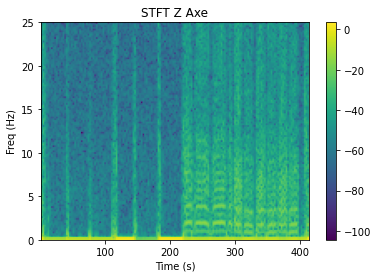

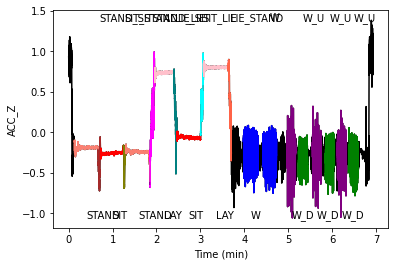

In [8]:
#Ex4-2 com 4-3 -
def stft(data,labels,experimentID,userID,atividades):
    frequencia = 50
    periodo = 1 / frequencia
    z = []
    time = []
    
    for i in range(len(data)):
        time.append((i / frequencia) / 60)
        z.append(data[i][2])

    zNum = np.array(z)
    aux = zNum.size
    
    tempoTotalAtividade = aux * periodo / 60
    frameRate = 0.01 * tempoTotalAtividade

    tover = frameRate / 2
    nfr = round(frameRate * frequencia)
    h = np.hamming(nfr)

    nover = round(tover * frequencia)
    spectre = []
    f = np.linspace(-frequencia / 2, frequencia / 2, nfr)
    x = np.where(f > 0)

    for j in range(0, aux - nfr, nfr - nover):
        xfr = z[j:j + nfr] * h
        m_x_frame = abs(np.fft.fftshift(np.fft.fft(xfr)))
        spectre = np.hstack([spectre, m_x_frame[x]])


    #gráfico para 4_3
    plt.figure()
    plt.title("STFT Z Axe")
    plt.specgram(spectre, Fs=frequencia)
    plt.xlabel("Time (s)")
    plt.ylabel("Freq (Hz)")
    cb = plt.colorbar()
    plt.show()

    #4.2
    aux_lab = []
    for i in range(len(labels)):
        if labels[i][0] == experimentID and labels[i][1] == userID:
            aux_lab.append([labels[i][2], labels[i][3], labels[i][4]])

    plt.figure()
    plt.plot(time, z, 'black')
    plt.xlabel("Time (min)")
    plt.ylabel("ACC_Z")
    for j in range(len(aux_lab)):
        plt.plot(time[aux_lab[j][1]:aux_lab[j][2]], z[aux_lab[j][1]:aux_lab[j][2]],
                 atividades[aux_lab[j][0]][1])
        if j % 2 != 0:
            plt.text((((aux_lab[j][1] + aux_lab[j][2]) // 2) / frequencia) / 60, max(z),
                     atividades[aux_lab[j][0]][0])
        else:
            plt.text((((aux_lab[j][1] + aux_lab[j][2]) // 2) / frequencia) / 60, min(z),
                     atividades[aux_lab[j][0]][0])
    plt.show()
    z.clear()
    time.clear()

stft(data[0],labels,exp[0],usr[0//2],atividades)